# 1. FILES' EXPLORATION

# 1.1. Driver file

In [1]:
#importing libraries

import pandas as pd
import numpy as np

In [2]:
#importing driver id file

driverid=pd.read_csv("data/driver_ids.csv")

In [3]:
#check file

driverid.head()

,driver_id,driver_onboard_date
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00
1,007f0389f9c7b03ef97098422f902e62,2016-03-29 00:00:00
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05 00:00:00
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23 00:00:00
4,01674381af7edd264113d4e6ed55ecda,2016-04-29 00:00:00


In [4]:
#check the types

driverid.dtypes

driver_id              object
driver_onboard_date    object
dtype: object

In [5]:
#check dataframe size to know the amount of drivers

driverid.index

RangeIndex(start=0, stop=937, step=1)

In [6]:
#check if there are nulls

driverid.isnull().value_counts()

driver_id  driver_onboard_date
False      False                  937
dtype: int64

In [7]:
#check if driver is unique


driverid['driver_id'].value_counts().sort_values(ascending=False)


2b1f99b4f3360623da8fdcd39828122e    1
da8f13b0ebc53fe1147d982f087b5806    1
a12d788b7cd01f696bb5ebf28fa739cc    1
363f684a638dac345e67fbb78e492efc    1
762db27fc4dd1e53dd4fa982ae2162b4    1
                                   ..
6c0555804ebade45096a199f932e949e    1
26efe85697b050171e2ac92d11f75605    1
e246b5012a29db02ad24ce4b7e332b9b    1
bf0a8a6ddc179a9466082343c5862904    1
2aa41b072dc16081ebe60ad5b17f5a4c    1
Name: driver_id, Length: 937, dtype: int64

In [8]:
#change to date time, on board date in the wrong format

driverid['driver_onboard_date']=pd.to_datetime(driverid['driver_onboard_date'],errors='coerce')

In [9]:
#confirm

driverid.dtypes

driver_id                      object
driver_onboard_date    datetime64[ns]
dtype: object

In [10]:
#check the year

driverid['driver_onboard_date'].dt.year.value_counts()

2016    937
Name: driver_onboard_date, dtype: int64

In [11]:
#check the month for seasonality

driverid['driver_onboard_date'].dt.month.value_counts()

4    591
5    239
3    107
Name: driver_onboard_date, dtype: int64

Only 3 months for analysis according to data, 3 months will be the basis for lifetime analysis

In [12]:
#check if there will be a possible day influence, for instance end of the month with more onboardings

driverid['driver_onboard_date'].dt.day.value_counts()

29    57
5     56
4     50
6     50
12    45
30    44
13    42
11    41
28    38
7     36
14    36
9     34
8     32
31    30
15    29
1     27
10    25
21    24
26    23
20    22
2     22
19    21
22    21
23    20
3     18
17    17
25    17
18    16
27    16
16    15
24    13
Name: driver_onboard_date, dtype: int64

# 1.2. Rider id

In [13]:
#importing driver id file

riderid=pd.read_csv("data/ride_ids.csv")

In [14]:
#check file

riderid.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100


In [15]:
#check the types

riderid.dtypes

driver_id          object
ride_id            object
ride_distance       int64
ride_duration       int64
ride_prime_time     int64
dtype: object

In [16]:
#confirm if there anre missing values

def ridenulls(column):
    return riderid.loc[riderid[column].isnull()]
    

In [17]:
#call function

ridenulls('ride_prime_time')

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time


The dataframe seems complete

Distance is in meters and duration in seconds. Both need conversion since the rate card will be in minutes and miles
1 minute = 60 seconds
1 mile = 1609.344 meters

In [18]:
#inser column with the duration in minutes

riderid["ride_duration_min"]=riderid["ride_duration"]/60

In [19]:
# insert column with the distance in miles

riderid["ride_distance_miles"]=riderid["ride_distance"]/1609.344

In [20]:
#inser columns with the duration in minutes

riderid["ride_primetime_min"]=riderid["ride_prime_time"]/60

In [21]:
#confirm both are correct

riderid.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,ride_duration_min,ride_distance_miles,ride_primetime_min
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,5.450000,1.125303,0.833333
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,13.483333,2.089050,0.000000
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,9.533333,2.039340,0.000000
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,55.633333,40.564976,0.416667
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,13.716667,2.556942,1.666667


In [22]:
#testing a result as reference

test=riderid.loc[riderid['ride_id']=="00003037a262d9ee40e61b5c0718f7f0"]
test

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,ride_duration_min,ride_distance_miles,ride_primetime_min
167241,d967f5296732fa55266b5f1314e7447b,00003037a262d9ee40e61b5c0718f7f0,3698,1112,0,18.533333,2.297831,0.0


The duration is the time difference between picked_up_at and dropped_off_at from another table

## 1.2.1. Adding rates

- **Base Fare** \$2.00
- **Cost per Mile** \$1.15
- **Cost per Minute** \$0.22
- **Service Fee** \$1.75
- **Minimum Fare** \$5.00
- **Maximum Fare** \$400.00

In [23]:
#add base fare

riderid["base_fare$"]=2

In [24]:
#add cost per mile

riderid["distance_ride_revenue$"]=riderid["ride_distance_miles"]*1.15

In [25]:
#add cost per minute

riderid["duration_ride_revenue$"]=riderid["ride_duration_min"]*0.22

In [26]:
#add service fee

riderid["service_fee$"]=1.75

In [27]:
# sum the ride value before the service fee, so base fare plus duration revenue plus distance revenue

riderid["driver_revenue_before_commission$"]=riderid["base_fare$"]+riderid["distance_ride_revenue$"]+riderid["duration_ride_revenue$"]

In [28]:
#confirm

riderid.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,ride_duration_min,ride_distance_miles,ride_primetime_min,base_fare$,distance_ride_revenue$,duration_ride_revenue$,service_fee$,driver_revenue_before_commission$
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,5.450000,1.125303,0.833333,2,1.294099,1.199000,1.75,4.493099
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,13.483333,2.089050,0.000000,2,2.402407,2.966333,1.75,7.368741
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,9.533333,2.039340,0.000000,2,2.345241,2.097333,1.75,6.442575
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,55.633333,40.564976,0.416667,2,46.649722,12.239333,1.75,60.889055
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,13.716667,2.556942,1.666667,2,2.940484,3.017667,1.75,7.958150


# 1.3. Rider Time stamps

In [29]:
#importing driver id file

ridertime=pd.read_csv("data/ride_timestamps.csv")

In [30]:
#check file

ridertime.head()

,ride_id,event,timestamp
0,00003037a262d9ee40e61b5c0718f7f0,requested_at,2016-06-13 09:39:19
1,00003037a262d9ee40e61b5c0718f7f0,accepted_at,2016-06-13 09:39:51
2,00003037a262d9ee40e61b5c0718f7f0,arrived_at,2016-06-13 09:44:31
3,00003037a262d9ee40e61b5c0718f7f0,picked_up_at,2016-06-13 09:44:33
4,00003037a262d9ee40e61b5c0718f7f0,dropped_off_at,2016-06-13 10:03:05


In [31]:
# check types

ridertime.dtypes

ride_id      object
event        object
timestamp    object
dtype: object

In [32]:
#change timestamp to correct type

ridertime['timestamp']=pd.to_datetime(ridertime['timestamp'],errors='coerce')

In [33]:
# check types

ridertime.dtypes

ride_id              object
event                object
timestamp    datetime64[ns]
dtype: object

In [34]:
#add month

ridertime["month"]=ridertime["timestamp"].dt.month

In [35]:
# check variation

ridertime["month"].value_counts()

5.0    418294
6.0    346486
4.0    199384
3.0      6240
Name: month, dtype: int64

In [36]:
#add day

ridertime["day"]=ridertime["timestamp"].dt.day

In [37]:
# check variation

ridertime["day"].value_counts()

21.0    37040
25.0    36783
15.0    36674
14.0    36555
20.0    36346
26.0    36057
16.0    35572
24.0    35458
17.0    35308
22.0    35098
13.0    34828
23.0    34293
11.0    33543
19.0    32878
10.0    32777
18.0    32595
12.0    32518
7.0     31627
9.0     30766
6.0     30721
4.0     29479
5.0     28832
8.0     28702
3.0     28685
28.0    26637
27.0    26557
2.0     25821
29.0    25775
1.0     24408
30.0    24026
31.0    14045
Name: day, dtype: int64

In [38]:
# add weekday

ridertime["weekday"]=ridertime["timestamp"].dt.weekday

Monday=0, Sunday=6

In [39]:
# check variation

ridertime["weekday"].value_counts()

4.0    170113
5.0    160010
3.0    149367
2.0    137032
1.0    125905
6.0    120157
0.0    107820
Name: weekday, dtype: int64

It seems weekdays more popular are 4 and 5, Friday and Saturday. Further analysis will be performed next

In [40]:
# add hour

ridertime["hour"]=ridertime["timestamp"].dt.hour

In [41]:
# check variation

ridertime["hour"].value_counts()

19.0    70891
18.0    68947
20.0    64591
21.0    64444
22.0    60147
17.0    57222
23.0    48933
9.0     48835
16.0    48074
8.0     44248
10.0    43713
15.0    43087
11.0    41531
12.0    41165
14.0    40080
13.0    39577
0.0     34220
7.0     32742
1.0     24602
6.0     16653
2.0     15173
5.0      8174
3.0      7371
4.0      5984
Name: hour, dtype: int64

Night time seems more popular. Further analysis will be performed next

# 1.3.1: Checking time between events

In [42]:
# create a copy

timedif=ridertime.copy()

The driver pay includes time spend waiting, starting one minute after arrival is confirmed according to Lyft's website.
Therefore, the difference between the events arrived at and picked up at should be taken into consideration.

In [43]:
# create dataframe with the two events only

waiting_time=timedif.groupby(['ride_id'], as_index=False).nth([2,3])

In [44]:
# confirm dataframe

waiting_time.head()

,ride_id,event,timestamp,month,day,weekday,hour
2,00003037a262d9ee40e61b5c0718f7f0,arrived_at,2016-06-13 09:44:31,6.0,13.0,0.0,9.0
3,00003037a262d9ee40e61b5c0718f7f0,picked_up_at,2016-06-13 09:44:33,6.0,13.0,0.0,9.0
7,00005eae40882760d675da5effb89ae3,arrived_at,2016-05-14 05:26:17,5.0,14.0,5.0,5.0
8,00005eae40882760d675da5effb89ae3,picked_up_at,2016-05-14 05:26:18,5.0,14.0,5.0,5.0
12,000061d42cf29f73b591041d9a1b2973,arrived_at,2016-05-16 15:47:29,5.0,16.0,0.0,15.0


In [45]:
#check time difference between requested and dropped of

waiting_time2=waiting_time.groupby(['ride_id'], as_index=False).timestamp.diff()

In [46]:
# introduce the ride id again

waiting_time2['rideid']=waiting_time['ride_id']

In [47]:
#confirm

waiting_time2.head()

,timestamp,rideid
2,NaT,00003037a262d9ee40e61b5c0718f7f0
3,0 days 00:00:02,00003037a262d9ee40e61b5c0718f7f0
7,NaT,00005eae40882760d675da5effb89ae3
8,0 days 00:00:01,00005eae40882760d675da5effb89ae3
12,NaT,000061d42cf29f73b591041d9a1b2973


In [48]:
#drop nulls

waiting_time2=waiting_time2.dropna() 

In [49]:
#confirm

waiting_time2

,timestamp,rideid
3,0 days 00:00:02,00003037a262d9ee40e61b5c0718f7f0
8,0 days 00:00:01,00005eae40882760d675da5effb89ae3
13,0 days 00:00:03,000061d42cf29f73b591041d9a1b2973
18,0 days 00:00:04,00006efeb0d5e3ccad7d921ddeee9900
23,0 days 00:00:03,0000d9b24d8ccdd991b76258e616fa01
...,...,...
970383,0 days 00:00:03,fffebb46effb90ce758fdff68b569355
970388,0 days 00:00:02,ffff9c38173ddfa17bdd115c463e329f
970393,0 days 00:00:02,ffff9e431f7fade54b2550ac19ab6e64
970398,0 days 00:00:01,ffffa07f48f2f885f714765d794ad596


In [50]:
# convert the timestamp difference to minutes

waiting_time2['waiting_minutes'] = waiting_time2['timestamp'].dt.total_seconds().div(60).astype(int)

In [51]:
# check sorted values

waiting_time2.sort_values(by=['waiting_minutes'], ascending=False)

,timestamp,rideid,waiting_minutes
775388,0 days 00:13:51,ccc322deb9027f2652c5b784f46301b7,13
500398,0 days 00:11:23,845063fbad82733755a21d025b3da831,11
864318,0 days 00:07:06,e40251551258dc1c387039892e3bd277,7
30883,0 days 00:05:11,0812d4aa653b5ca9d32a360c9d9f68b9,5
179278,0 days 00:05:10,2f7a5d23e08e6042e3e8efb11d3e4701,5
...,...,...,...
755538,-1 days +23:16:22,c7975399543ee7bf0a1f9cd869d0d80f,-43
513378,-1 days +23:15:24,87b6e22b8618d40283d93802698fdcbf,-44
175918,-1 days +23:09:11,2e8b3bf2654e9ea4787d8efd2f2291bd,-50
692263,-1 days +23:02:04,b6c1bfcb6a1bacfc3733fc24847803f2,-57


In [52]:
# only keep minutes >=1, that influences lyft revenue

waiting_time2['waiting_minutes'] = np.where(waiting_time2['waiting_minutes'] >= 1, waiting_time2['waiting_minutes'], "Not relevant")


In [53]:
# drop non relevant

waiting_time2.drop(waiting_time2[waiting_time2['waiting_minutes'] == 'Not relevant'].index, inplace=True)

In [54]:
# check

waiting_time2["waiting_minutes"].value_counts()

1     3780
2       19
3        8
5        5
7        1
11       1
13       1
Name: waiting_minutes, dtype: int64

In [55]:
# change type

waiting_time2["waiting_minutes"] = waiting_time2["waiting_minutes"].astype(float)

In [56]:
# confirm

waiting_time2.dtypes

timestamp          timedelta64[ns]
rideid                      object
waiting_minutes            float64
dtype: object

Cost per Minute $0.22

In [57]:
# add the cost for waiting time

waiting_time2["cost_waiting_time$"]=waiting_time2["waiting_minutes"]*0.22

In [58]:
# confirm

waiting_time2.head()

,timestamp,rideid,waiting_minutes,cost_waiting_time$
78,0 days 00:01:00,000399d2e73490f5ac5e65eae391f6f8,1.0,0.22
608,0 days 00:01:00,002a1cf462fee4f6c9d8da11fca4830a,1.0,0.22
708,0 days 00:01:00,003115b37c952878769e2f2a585cf664,1.0,0.22
1033,0 days 00:01:00,0046dbc3563e3f59405c1a5360863942,1.0,0.22
1183,0 days 00:01:00,004edbe47f7b98f0ceb65dd3f40b60c3,1.0,0.22


# 2. ANALYSIS

In this section, the actual data analysis will be performed. 
It is an attemp to answer the questions of the challenge and dig deeper into additional questions

# 2.1. Driver's  Lifetime Value Analysis

The goal of this section is to understand the driver's lifetime value and possible driver clusters

Some assumptions were made, additionally to the 20% commission that Lyft takes from the driver revenue

Minimum fare assumption according to website
If the commission is less that 1 ( minimum fare $5 * 0.2), then it has a decrease commission of 0.8*(5 - drivers revenue before commission taken)
It seems lyft pays the driver if the minimum fare is not reached

Maximum fare assumption according to website
If the commission of lyft is more than 80 ( maximum fare $400 * 0.2), since the max is 400, the revenue is 80 + (driver_revenue_before_commission$-$400)

Lyft gets the total amount of the service fee per ride

Waiting time is added to the revenue

In [59]:
# check tables to merge

waiting_time2.head()

,timestamp,rideid,waiting_minutes,cost_waiting_time$
78,0 days 00:01:00,000399d2e73490f5ac5e65eae391f6f8,1.0,0.22
608,0 days 00:01:00,002a1cf462fee4f6c9d8da11fca4830a,1.0,0.22
708,0 days 00:01:00,003115b37c952878769e2f2a585cf664,1.0,0.22
1033,0 days 00:01:00,0046dbc3563e3f59405c1a5360863942,1.0,0.22
1183,0 days 00:01:00,004edbe47f7b98f0ceb65dd3f40b60c3,1.0,0.22


In [60]:
riderid.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,ride_duration_min,ride_distance_miles,ride_primetime_min,base_fare$,distance_ride_revenue$,duration_ride_revenue$,service_fee$,driver_revenue_before_commission$
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,5.450000,1.125303,0.833333,2,1.294099,1.199000,1.75,4.493099
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,13.483333,2.089050,0.000000,2,2.402407,2.966333,1.75,7.368741
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,9.533333,2.039340,0.000000,2,2.345241,2.097333,1.75,6.442575
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,55.633333,40.564976,0.416667,2,46.649722,12.239333,1.75,60.889055
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,13.716667,2.556942,1.666667,2,2.940484,3.017667,1.75,7.958150


In [61]:
# in order to add the waiting time, df with waiting time information needs to be merged with ride information

total_revenue_df=riderid.merge(waiting_time2, how="left", left_on="ride_id", right_on="rideid")

In [62]:
# the nulls from the merge should be replaced with zero

total_revenue_df["cost_waiting_time$"]=total_revenue_df["cost_waiting_time$"].fillna(0)

In [63]:
#confirm 

total_revenue_df.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,ride_duration_min,ride_distance_miles,ride_primetime_min,base_fare$,distance_ride_revenue$,duration_ride_revenue$,service_fee$,driver_revenue_before_commission$,timestamp,rideid,waiting_minutes,cost_waiting_time$
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,5.450000,1.125303,0.833333,2,1.294099,1.199000,1.75,4.493099,NaT,NaN,NaN,0.0
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,13.483333,2.089050,0.000000,2,2.402407,2.966333,1.75,7.368741,NaT,NaN,NaN,0.0
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,9.533333,2.039340,0.000000,2,2.345241,2.097333,1.75,6.442575,NaT,NaN,NaN,0.0
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,55.633333,40.564976,0.416667,2,46.649722,12.239333,1.75,60.889055,NaT,NaN,NaN,0.0
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,13.716667,2.556942,1.666667,2,2.940484,3.017667,1.75,7.958150,NaT,NaN,NaN,0.0


In [64]:
# add waiting time revenue to the driver_revenue_before_commission

total_revenue_df["final_driver_revenue_before_commission$"]=total_revenue_df["driver_revenue_before_commission$"]+total_revenue_df["cost_waiting_time$"]

In [65]:
# check for correlations that can influence the drivers revenue
# investigate possible relations with drivers revenue,as prime time, that can be associated to the satisfaction

total_revenue_df.corr()['final_driver_revenue_before_commission$']

ride_distance                              0.987464
ride_duration                              0.877100
ride_prime_time                           -0.034862
ride_duration_min                          0.877100
ride_distance_miles                        0.987464
ride_primetime_min                        -0.034862
base_fare$                                      NaN
distance_ride_revenue$                     0.987464
duration_ride_revenue$                     0.877100
service_fee$                                    NaN
driver_revenue_before_commission$          0.999992
waiting_minutes                            0.007821
cost_waiting_time$                         0.015112
final_driver_revenue_before_commission$    1.000000
Name: final_driver_revenue_before_commission$, dtype: float64

In [66]:
# to calculate Lyft revenue some columns are not needed

coldrop=["ride_distance","ride_duration","ride_prime_time","ride_duration_min","ride_distance_miles","timestamp","rideid","waiting_minutes","driver_revenue_before_commission$"]
lifetime_revenue_df=total_revenue_df.drop(coldrop, axis=1)

In [67]:
# confirm

lifetime_revenue_df.head()

,driver_id,ride_id,ride_primetime_min,base_fare$,distance_ride_revenue$,duration_ride_revenue$,service_fee$,cost_waiting_time$,final_driver_revenue_before_commission$
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,0.833333,2,1.294099,1.199000,1.75,0.0,4.493099
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,0.000000,2,2.402407,2.966333,1.75,0.0,7.368741
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,0.000000,2,2.345241,2.097333,1.75,0.0,6.442575
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,0.416667,2,46.649722,12.239333,1.75,0.0,60.889055
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,1.666667,2,2.940484,3.017667,1.75,0.0,7.958150


In [68]:
# add column with the 20% commission for Lyft

lifetime_revenue_df["lyft_20_revenue"]=lifetime_revenue_df["final_driver_revenue_before_commission$"]*0.2

In [69]:
# add the minimum fare condition

lifetime_revenue_df["lyft_20_revenue_min"] = np.where(lifetime_revenue_df["lyft_20_revenue"] < 1,(lifetime_revenue_df["lyft_20_revenue"]-(0.8*(5-lifetime_revenue_df["final_driver_revenue_before_commission$"]))) , lifetime_revenue_df["lyft_20_revenue"])

In [70]:
# add the maximum fare condition

lifetime_revenue_df["lyft_20_revenue_final"]= np.where(lifetime_revenue_df["lyft_20_revenue"] > 80, (80 + (lifetime_revenue_df["final_driver_revenue_before_commission$"]-400)),lifetime_revenue_df["lyft_20_revenue_min"])
                                                                                                                                                                             

In [71]:
# check an example

lifetime_revenue_df[lifetime_revenue_df["lyft_20_revenue"]>80]

,driver_id,ride_id,ride_primetime_min,base_fare$,distance_ride_revenue$,duration_ride_revenue$,service_fee$,cost_waiting_time$,final_driver_revenue_before_commission$,lyft_20_revenue,lyft_20_revenue_min,lyft_20_revenue_final
1921,02d6a6b8a6da15fc219a9570f7ebbe78,e7f8524051edb7b28e86391f6461bc03,0.0,2,517.838852,103.414667,1.75,0.0,623.253519,124.650704,124.650704,303.253519


In [72]:
# one last fee needs to be added, the service fee

lifetime_revenue_df["lyft_total_revenue_ride$"]=lifetime_revenue_df["lyft_20_revenue_final"]+lifetime_revenue_df["service_fee$"]

In [73]:
# check

lifetime_revenue_df.head()

,driver_id,ride_id,ride_primetime_min,base_fare$,distance_ride_revenue$,duration_ride_revenue$,service_fee$,cost_waiting_time$,final_driver_revenue_before_commission$,lyft_20_revenue,lyft_20_revenue_min,lyft_20_revenue_final,lyft_total_revenue_ride$
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,0.833333,2,1.294099,1.199000,1.75,0.0,4.493099,0.898620,0.493099,0.493099,2.243099
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,0.000000,2,2.402407,2.966333,1.75,0.0,7.368741,1.473748,1.473748,1.473748,3.223748
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,0.000000,2,2.345241,2.097333,1.75,0.0,6.442575,1.288515,1.288515,1.288515,3.038515
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,0.416667,2,46.649722,12.239333,1.75,0.0,60.889055,12.177811,12.177811,12.177811,13.927811
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,1.666667,2,2.940484,3.017667,1.75,0.0,7.958150,1.591630,1.591630,1.591630,3.341630


In [74]:
# calculate the average rides per driver and revenue per ride

driver_mean_df = lifetime_revenue_df.groupby(['driver_id'], as_index = False).agg({ 'ride_id':'count','lyft_total_revenue_ride$': 'mean'}).sort_values(by='lyft_total_revenue_ride$', ascending = False)


In [75]:
# check

driver_mean_df

,driver_id,ride_id,lyft_total_revenue_ride$
9,02d6a6b8a6da15fc219a9570f7ebbe78,62,9.808984
800,d9ef4b835e202c9b24315b999894362a,48,5.813543
87,186d02f3ae489428440a352e3fe503a4,32,5.164416
131,22d43c4cd79a3cbab663d9eadd1e5995,373,5.129261
859,e680a2b4ece6a7010a4451601d73aa62,83,5.119327
...,...,...,...
758,ce577ac73e9022772835abf8d37e91d5,53,3.056216
640,a7fa04a6b4111cac92989ac266ec40d2,60,3.027291
309,4f06c1412e8f2c16c96abb053997112f,35,2.997937
119,1ed175c60fdf7380fefc804bf4dd75f3,35,2.913328


In [76]:
# average earnings per ride per driver

driver_mean_df["lyft_total_revenue_ride$"].mean()

3.708748038606655

In [77]:
# average rides per driver

driver_mean_df["ride_id"].mean()

206.51227321237994

Further analysis to cluster the drivers as occasional, average and frequent drivers

In [78]:
# create a cluster for occasional, average and frequent drivers

driver_frequency_lifetime_df = lifetime_revenue_df.groupby(['driver_id'], as_index = False).agg({ 'ride_id':'count','lyft_total_revenue_ride$': 'mean'}).sort_values(by='ride_id', ascending = False)

In [79]:
# check

driver_frequency_lifetime_df

,driver_id,ride_id,lyft_total_revenue_ride$
354,5ccc0e6dc9c7475caf785cdce7b8eb7a,919,3.632313
308,4eb382d1f7d50fae1294964263d1ce82,831,3.531804
509,844e9be5a30d8d9c1f8e9ddb086ff717,821,3.594008
401,689bdf87fb2de49f98bf4946cfaa5068,794,3.383696
217,3788dc9e91f1548816ce8b5af07ddadc,783,3.835977
...,...,...,...
435,706466935b9e1d04e4e116be7ce90ea9,19,3.446007
922,fd831ca1d79ae5c6fc3a679a22e5b8cf,19,3.095905
424,6df6c8f8d3c2a93314245a604c02bed1,16,4.157381
494,7ff85c5c0e9324e28d1e0d0589c364bd,3,3.666484


In [80]:
# for the lifetime average, check average count of rides and revenue per ride

lifetime_stats=driver_frequency_lifetime_df.describe().transpose()
lifetime_stats

,count,mean,std,min,25%,50%,75%,max
ride_id,937.0,206.512273,173.254063,3.000000,47.000000,200.000000,316.000000,919.000000
lyft_total_revenue_ride$,937.0,3.708748,0.411728,2.281675,3.467148,3.628549,3.866596,9.808984


In [81]:
# average driver's lifetime value

total_avg_lifetime_value=206.512273*3.708748
total_avg_lifetime_value

765.9019794642039

In [82]:
# check the descriptive statistics in order to create the clusters

descriptive=driver_frequency_lifetime_df["ride_id"].describe().transpose()

descriptive

count    937.000000
mean     206.512273
std      173.254063
min        3.000000
25%       47.000000
50%      200.000000
75%      316.000000
max      919.000000
Name: ride_id, dtype: float64

In [83]:
# segmentation

print("25 percentil:", descriptive["25%"])
print("75 percentil:", descriptive["75%"])

25 percentil: 47.0
75 percentil: 316.0


Decided to create the driver segments using the 25th and 75th percentil 
Outliers were kept due to nature of the business

Driver`s lifetime value for each segment of drivers will be calculated, based on:
- Occasional driver =< 47 rides
- 47 < Average driver < 316
- Frequent driver >= 316

In [84]:
# occasional drivers

occasional_df=driver_frequency_lifetime_df.loc[(driver_frequency_lifetime_df["ride_id"]<=47)]


In [85]:
# confirm

occasional_df

,driver_id,ride_id,lyft_total_revenue_ride$
320,52bc8ebc7db90d5b77453bf475677ebd,47,3.475375
505,838495eb3f025e512228480eae127522,47,3.176864
900,f395649fb47860aebc4817c7a6ea90e6,47,3.478963
273,44e9f61af64c2d25412a0f4532ada63c,47,3.086757
565,94699541835b03d2a18e265299c11213,47,4.382304
...,...,...,...
435,706466935b9e1d04e4e116be7ce90ea9,19,3.446007
922,fd831ca1d79ae5c6fc3a679a22e5b8cf,19,3.095905
424,6df6c8f8d3c2a93314245a604c02bed1,16,4.157381
494,7ff85c5c0e9324e28d1e0d0589c364bd,3,3.666484


In [86]:
# check the average lifetime value of an occasional driver

occasional_df_stats=occasional_df.describe().transpose()
occasional_df_stats

,count,mean,std,min,25%,50%,75%,max
ride_id,245.0,35.987755,7.631622,3.000000,31.000000,37.000000,42.00000,47.000000
lyft_total_revenue_ride$,245.0,3.698817,0.431926,2.281675,3.387837,3.643674,3.94524,5.164416


In [87]:
# occasional driver lifetime value taken into consideration the average amount of rides and the average revenue per ride

occasional_avg_lifetime=35.987755*3.698817
occasional_avg_lifetime

133.112119985835

In [88]:
# average driver

average_df=driver_frequency_lifetime_df.loc[(driver_frequency_lifetime_df["ride_id"]>47)&(driver_frequency_lifetime_df["ride_id"]<316)]

In [89]:
# check the average lifetime value of an average driver

average_df_stats=average_df.describe().transpose()
average_df_stats

,count,mean,std,min,25%,50%,75%,max
ride_id,455.0,173.419780,90.52148,48.000000,66.500000,203.000000,250.500000,315.000000
lyft_total_revenue_ride$,455.0,3.740202,0.45633,3.027291,3.491933,3.645725,3.899092,9.808984


In [90]:
# average driver lifetime value taken into consideration the average amount of rides and the average revenue per ride

average_avg_lifetime=173.419780*3.740202
average_avg_lifetime

648.62500799556

In [91]:
# frequent drivers

frequent_df=driver_frequency_lifetime_df.loc[(driver_frequency_lifetime_df["ride_id"]>316)]

In [92]:
# check the average lifetime value of a frequent driver

frequent_df_stats=frequent_df.describe().transpose()
frequent_df_stats

,count,mean,std,min,25%,50%,75%,max
ride_id,234.0,447.995726,114.552666,317.000000,360.250000,422.000000,503.25000,919.000000
lyft_total_revenue_ride$,234.0,3.656184,0.271176,3.231554,3.486121,3.601187,3.76544,5.129261


In [93]:
# average driver lifetime value taken into consideration the average amount of rides and the average revenue per ride

frequent_avg_lifetime=447.995726*3.656184
frequent_avg_lifetime

1637.954805469584

# 2.2. Projected lifetime - days/time analysis

The goal is to understand how many days tend to pass by from onboarding until last ride

In [94]:
# merge tables to get the orboarded time until last recorded drive

mergeids=driverid.merge(riderid, left_on="driver_id", right_on="driver_id")

In [95]:
# check

mergeids.head()

,driver_id,driver_onboard_date,ride_id,ride_distance,ride_duration,ride_prime_time,ride_duration_min,ride_distance_miles,ride_primetime_min,base_fare$,distance_ride_revenue$,duration_ride_revenue$,service_fee$,driver_revenue_before_commission$
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,5.450000,1.125303,0.833333,2,1.294099,1.199000,1.75,4.493099
1,002be0ffdc997bd5c50703158b7c2491,2016-03-29,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,13.483333,2.089050,0.000000,2,2.402407,2.966333,1.75,7.368741
2,002be0ffdc997bd5c50703158b7c2491,2016-03-29,029227c4c2971ce69ff2274dc798ef43,3282,572,0,9.533333,2.039340,0.000000,2,2.345241,2.097333,1.75,6.442575
3,002be0ffdc997bd5c50703158b7c2491,2016-03-29,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,55.633333,40.564976,0.416667,2,46.649722,12.239333,1.75,60.889055
4,002be0ffdc997bd5c50703158b7c2491,2016-03-29,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,13.716667,2.556942,1.666667,2,2.940484,3.017667,1.75,7.958150


In [96]:
# further merge needed

mergeids2=mergeids.merge(timedif, left_on="ride_id", right_on="ride_id")

In [97]:
# check

mergeids2.head()

,driver_id,driver_onboard_date,ride_id,ride_distance,ride_duration,ride_prime_time,ride_duration_min,ride_distance_miles,ride_primetime_min,base_fare$,distance_ride_revenue$,duration_ride_revenue$,service_fee$,driver_revenue_before_commission$,event,timestamp,month,day,weekday,hour
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,5.45,1.125303,0.833333,2,1.294099,1.199,1.75,4.493099,requested_at,2016-04-23 02:13:50,4.0,23.0,5.0,2.0
1,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,5.45,1.125303,0.833333,2,1.294099,1.199,1.75,4.493099,accepted_at,2016-04-23 02:14:15,4.0,23.0,5.0,2.0
2,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,5.45,1.125303,0.833333,2,1.294099,1.199,1.75,4.493099,arrived_at,2016-04-23 02:16:36,4.0,23.0,5.0,2.0
3,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,5.45,1.125303,0.833333,2,1.294099,1.199,1.75,4.493099,picked_up_at,2016-04-23 02:16:40,4.0,23.0,5.0,2.0
4,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,5.45,1.125303,0.833333,2,1.294099,1.199,1.75,4.493099,dropped_off_at,2016-04-23 02:22:07,4.0,23.0,5.0,2.0


In [98]:
# drop unnecessary columns 

onboarding_lastridedf = mergeids2.drop(["ride_distance","ride_duration","ride_prime_time","ride_duration_min","ride_distance_miles","base_fare$","duration_ride_revenue$","distance_ride_revenue$","service_fee$","driver_revenue_before_commission$","month","day","weekday","hour"], axis=1)

onboarding_lastridedf.head()

,driver_id,driver_onboard_date,ride_id,ride_primetime_min,event,timestamp
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,0.833333,requested_at,2016-04-23 02:13:50
1,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,0.833333,accepted_at,2016-04-23 02:14:15
2,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,0.833333,arrived_at,2016-04-23 02:16:36
3,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,0.833333,picked_up_at,2016-04-23 02:16:40
4,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,0.833333,dropped_off_at,2016-04-23 02:22:07


In [99]:
# check the date difference, only last timestamp needed for this goal

last_ride = onboarding_lastridedf.sort_values('timestamp').groupby(['driver_id'], as_index=False).last()

In [100]:
# confirm only dropped off stayed

last_ride.head()

,driver_id,driver_onboard_date,ride_id,ride_primetime_min,event,timestamp
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29,93075a021099783be0af4afa8b3ee7ed,0.000000,dropped_off_at,2016-06-23 10:29:53
1,007f0389f9c7b03ef97098422f902e62,2016-03-29,d31d7c47c230715656f7842f2ef4641a,0.000000,dropped_off_at,2016-06-22 13:28:38
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05,2029bd672ace7ce8f7d92d69a34a37a1,0.833333,dropped_off_at,2016-06-12 20:30:38
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23,d19a77f52782f6f0e299101dd82af9f0,0.000000,dropped_off_at,2016-06-26 10:36:13
4,01674381af7edd264113d4e6ed55ecda,2016-04-29,c1da2e61a6a44505ee12402f413c0878,0.833333,dropped_off_at,2016-06-24 13:27:38


In [101]:
# check the types for calculation

last_ride.dtypes

driver_id                      object
driver_onboard_date    datetime64[ns]
ride_id                        object
ride_primetime_min            float64
event                          object
timestamp              datetime64[ns]
dtype: object

In [102]:
# put in the same type

last_ride['timestamp'] = last_ride['timestamp'].dt.date
last_ride['driver_onboard_date'] = last_ride['driver_onboard_date'].dt.date


In [103]:
# calculate 

last_ride["time_onboard_to_last_ride"]=last_ride["timestamp"]-last_ride["driver_onboard_date"]

In [104]:
last_ride.head(5)

,driver_id,driver_onboard_date,ride_id,ride_primetime_min,event,timestamp,time_onboard_to_last_ride
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29,93075a021099783be0af4afa8b3ee7ed,0.000000,dropped_off_at,2016-06-23,86 days
1,007f0389f9c7b03ef97098422f902e62,2016-03-29,d31d7c47c230715656f7842f2ef4641a,0.000000,dropped_off_at,2016-06-22,85 days
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05,2029bd672ace7ce8f7d92d69a34a37a1,0.833333,dropped_off_at,2016-06-12,68 days
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23,d19a77f52782f6f0e299101dd82af9f0,0.000000,dropped_off_at,2016-06-26,64 days
4,01674381af7edd264113d4e6ed55ecda,2016-04-29,c1da2e61a6a44505ee12402f413c0878,0.833333,dropped_off_at,2016-06-24,56 days


In [105]:
# import libraries for plotting and stats

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [106]:
# convert the time from onboard until last ride into int to plot

last_ride["time_onboard_to_last_ride"]=last_ride["time_onboard_to_last_ride"].dt.days

In [107]:
# confirm

last_ride.dtypes

driver_id                     object
driver_onboard_date           object
ride_id                       object
ride_primetime_min           float64
event                         object
timestamp                     object
time_onboard_to_last_ride      int64
dtype: object

In [108]:
# check average for reference

meanline=last_ride["time_onboard_to_last_ride"].mean()
meanline

55.10513739545998

Text(0.5, 1.0, 'Driver`s Lifetime')

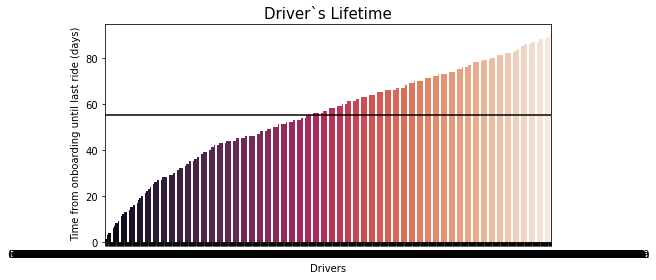

In [109]:
#plot checking for trends

fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data=last_ride,
                x="driver_id",
                y="time_onboard_to_last_ride",
                order=last_ride.sort_values('time_onboard_to_last_ride').driver_id,
                palette="rocket",
                ax=ax);
ax.axhline (meanline, color="black")
plt.xlabel("Drivers", size=10)
plt.ylabel("Time from onboarding until last ride (days)", size=10)
plt.title("Driver`s Lifetime", size=15)

In [110]:
# create a dataframe just with days

driver_onboarding_df=last_ride[["driver_id","time_onboard_to_last_ride"]]

In [111]:
# new merged dataframe to check for correlation between amount of rides and time staying on board

avg_nr_rides_df=driver_onboarding_df.merge(driver_frequency_lifetime_df, left_on="driver_id", right_on="driver_id")
avg_nr_rides_df.columns=["driver_id","time_onboard_to_last_ride","number_of_rides","lyft_total_revenue_ride$"]
avg_nr_rides_df.head()

,driver_id,time_onboard_to_last_ride,number_of_rides,lyft_total_revenue_ride$
0,002be0ffdc997bd5c50703158b7c2491,86,277,3.528583
1,007f0389f9c7b03ef97098422f902e62,85,31,3.058267
2,011e5c5dfc5c2c92501b8b24d47509bc,68,34,3.824111
3,0152a2f305e71d26cc964f8d4411add9,64,191,3.812694
4,01674381af7edd264113d4e6ed55ecda,56,375,3.974707


In [112]:
# correlation

avg_nr_rides_df.corr()['time_onboard_to_last_ride']

time_onboard_to_last_ride    1.000000
number_of_rides              0.530863
lyft_total_revenue_ride$     0.035152
Name: time_onboard_to_last_ride, dtype: float64

Text(0.5, 1.0, 'Relationship Between Number of Active Days and Rides per Driver')

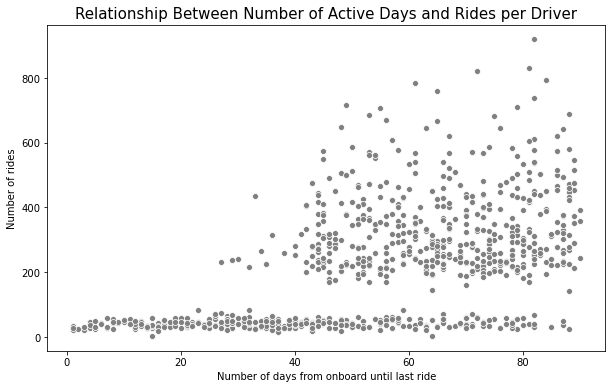

In [160]:
# scatter plot number of rides and working days

fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=avg_nr_rides_df,
                x="time_onboard_to_last_ride",
                y="number_of_rides",
                color="grey",
                ax=ax);

plt.xlabel("Number of days from onboard until last ride", size=10)
plt.ylabel("Number of rides", size=10)
plt.title("Relationship Between Number of Active Days and Rides per Driver", size=15)

Text(0.5, 1.0, 'Relationship between number of days working and rides per driver')

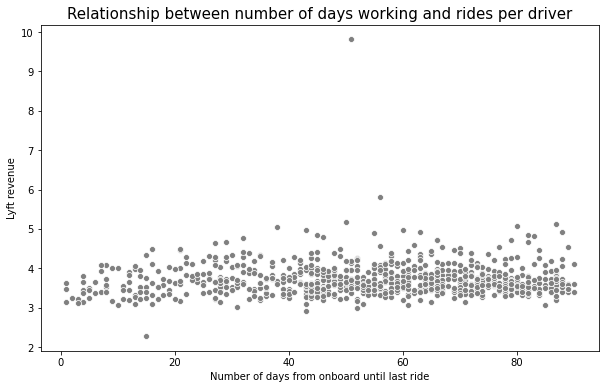

In [161]:
# scatter plot for revenue and number of rides

fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=avg_nr_rides_df,
                x="time_onboard_to_last_ride",
                y="lyft_total_revenue_ride$",
                color="grey",
                ax=ax);

plt.xlabel("Number of days from onboard until last ride", size=10)
plt.ylabel("Lyft revenue", size=10)
plt.title("Relationship between number of days working and rides per driver", size=15)

In [115]:
# check linear regression with both

avg_nr_rides_df2=avg_nr_rides_df.copy()

avg_nr_rides_df2=sm.add_constant(avg_nr_rides_df2)
y=avg_nr_rides_df2["time_onboard_to_last_ride"]
X=avg_nr_rides_df2[["const", "number_of_rides","lyft_total_revenue_ride$"]]

reg=sm.OLS(y, X).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     time_onboard_to_last_ride   R-squared:                       0.291
Model:                                   OLS   Adj. R-squared:                  0.289
Method:                        Least Squares   F-statistic:                     171.2
Date:                       Sun, 20 Dec 2020   Prob (F-statistic):           5.00e-63
Time:                               19:44:46   Log-Likelihood:                -3619.9
No. Observations:                        837   AIC:                             7246.
Df Residuals:                            834   BIC:                             7260.
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       21.6613      5.901      3.671      0.000      10.078      33.245
number_of_rides              0.0661      0.004     18.466      0.000       0.059       0.073
lyft_total_revenue_ride$     5.0892      1.542      3.301      0.001       2.064       8.115
==============================================================================
Omnibus:                       45.326   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.152
Skew:                          -0.051   Prob(JB):                     0.000114
Kurtosis:                       2.286   Cond. No.                     2.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Not a strong correlation in general, some clusters would probably have stronger correlations

# 2.3. Churn Analysis

The goal is to have a deeper understanding of the driver's churn and potential predictive indications. 
Critical churn weeks are checked in the section.

In [116]:
# check dataframe

avg_nr_rides_df.head()

,driver_id,time_onboard_to_last_ride,number_of_rides,lyft_total_revenue_ride$
0,002be0ffdc997bd5c50703158b7c2491,86,277,3.528583
1,007f0389f9c7b03ef97098422f902e62,85,31,3.058267
2,011e5c5dfc5c2c92501b8b24d47509bc,68,34,3.824111
3,0152a2f305e71d26cc964f8d4411add9,64,191,3.812694
4,01674381af7edd264113d4e6ed55ecda,56,375,3.974707


In [117]:
# check types

avg_nr_rides_df.dtypes

driver_id                     object
time_onboard_to_last_ride      int64
number_of_rides                int64
lyft_total_revenue_ride$     float64
dtype: object

In [118]:
# check number of drivers for the total

length=len(avg_nr_rides_df.index)
length

837

In [119]:
# function to check dataframe

def df_final_drive(days):
    return avg_nr_rides_df.loc[(avg_nr_rides_df["time_onboard_to_last_ride"]<=days)]

df_final_drive(7)

,driver_id,time_onboard_to_last_ride,number_of_rides,lyft_total_revenue_ride$
49,1110d496149d3d8c50276765924df831,7,28,3.392604
71,179ef343f855d34fa0262c720cdb9a52,3,21,3.225773
92,1c95fcac4de21d077072da1ea1705eb5,4,27,3.448461
161,31b451688ffc6f785c22bf74374507bc,4,41,3.644281
197,3b2dca5cc3db92a05ea35056887108b6,5,26,3.506661
221,417055c67f5510da99ac623b02b87847,4,39,3.368844
350,68b546b2f4102641d6774c1ce4f57457,1,22,3.469555
368,6ccc2af7009dfea4572de788827ac5a1,7,31,3.938311
373,6eb2e0f41fc9f1fbb70e7751035fdf87,1,35,3.632302
376,6f660e81330d77df19d4e3fb14b18730,6,44,3.652641


In [120]:
# function to check how many drivers stopped driving after X days

def time_rider(days):
    time_rider_df=avg_nr_rides_df.loc[(avg_nr_rides_df["time_onboard_to_last_ride"]<=days)]
    return len(time_rider_df.index)

In [121]:
# call function

time_rider(7)

19

In [122]:
# import library to round

import math

Check some churn rates for reference

In [123]:
# after 7 days

churn=math.floor((time_rider(7)/length)*100)
print ("churn:", churn, "%")

churn: 2 %


In [124]:
# after 28 days

churn=math.floor((time_rider(28)/length)*100)
print ("churn:", churn, "%")

churn: 14 %


In [125]:
# after 42 days

churn=math.floor((time_rider(42)/length)*100)
print ("churn:", churn, "%")

churn: 25 %


In [126]:
# after 56 days

churn=math.floor((time_rider(56)/length)*100)
print ("churn:", churn, "%")

churn: 48 %


In [127]:
# after 63 days

churn=math.floor((time_rider(63)/length)*100)
print ("churn:", churn, "%")

churn: 58 %


In [128]:
# after 70 days

churn=math.floor((time_rider(70)/length)*100)
print ("churn:", churn, "%")

churn: 71 %


In [129]:
# after 90 days

churn=math.floor((time_rider(90)/length)*100)
print ("churn:", churn, "%")

churn: 100 %


In [130]:
# set conditions looking into the data to look at critical weeks

conditions = [
    (avg_nr_rides_df['time_onboard_to_last_ride'] <= 7),
    ((avg_nr_rides_df['time_onboard_to_last_ride']<= 14)),
    ((avg_nr_rides_df['time_onboard_to_last_ride'] <= 21)),
    ((avg_nr_rides_df['time_onboard_to_last_ride'] <= 28)),
    ((avg_nr_rides_df['time_onboard_to_last_ride'] <= 35)),
    ((avg_nr_rides_df['time_onboard_to_last_ride'] <= 42)),
    ((avg_nr_rides_df['time_onboard_to_last_ride'] <= 49)),
    ((avg_nr_rides_df['time_onboard_to_last_ride'] <= 56)),
    ((avg_nr_rides_df['time_onboard_to_last_ride'] <= 63)),
    ((avg_nr_rides_df['time_onboard_to_last_ride'] <= 70)),
    ((avg_nr_rides_df['time_onboard_to_last_ride'] <= 77)),
    ((avg_nr_rides_df['time_onboard_to_last_ride'] <= 84)),
    (avg_nr_rides_df['time_onboard_to_last_ride'] > 84)
]

choices = [
    '1',
    '2',
    '3',
    '4',
    '5',
    '6',
    '7',
    '8',
    '9',
    '10',
    '11',
    '12',
    '12+'
]

avg_nr_rides_df["number_weeks_leaving"] = np.select(conditions, choices, "error")

In [131]:
# confirm new column

avg_nr_rides_df.head()

,driver_id,time_onboard_to_last_ride,number_of_rides,lyft_total_revenue_ride$,number_weeks_leaving
0,002be0ffdc997bd5c50703158b7c2491,86,277,3.528583,12+
1,007f0389f9c7b03ef97098422f902e62,85,31,3.058267,12+
2,011e5c5dfc5c2c92501b8b24d47509bc,68,34,3.824111,10
3,0152a2f305e71d26cc964f8d4411add9,64,191,3.812694,10
4,01674381af7edd264113d4e6ed55ecda,56,375,3.974707,8


Text(0.5, 1.0, "Driver's Churn")

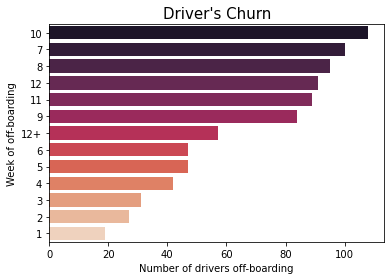

In [132]:
# plot to check number of drivers leaving after X weeks from onboard

sns.countplot(data=avg_nr_rides_df,
                y="number_weeks_leaving",
                order=avg_nr_rides_df["number_weeks_leaving"].value_counts().index,
                palette="rocket");

plt.xlabel("Number of drivers off-boarding", size=10)
plt.ylabel("Week of off-boarding", size=10)
plt.title("Driver's Churn", size=15)
                
               
            

# 2.4. Weekday, day and hour analysis

The goal is to check if there are weekdays, days and hours with more demand

In [133]:
# call df

ridertime.head()

,ride_id,event,timestamp,month,day,weekday,hour
0,00003037a262d9ee40e61b5c0718f7f0,requested_at,2016-06-13 09:39:19,6.0,13.0,0.0,9.0
1,00003037a262d9ee40e61b5c0718f7f0,accepted_at,2016-06-13 09:39:51,6.0,13.0,0.0,9.0
2,00003037a262d9ee40e61b5c0718f7f0,arrived_at,2016-06-13 09:44:31,6.0,13.0,0.0,9.0
3,00003037a262d9ee40e61b5c0718f7f0,picked_up_at,2016-06-13 09:44:33,6.0,13.0,0.0,9.0
4,00003037a262d9ee40e61b5c0718f7f0,dropped_off_at,2016-06-13 10:03:05,6.0,13.0,0.0,10.0


In [134]:
# count just the drop off, to count just one ride

time_per_ride_df = ridertime.sort_values('timestamp').groupby(['ride_id'], as_index=False).last()

In [135]:
# merge to have it with revenue and time

time_driver_ride_df=lifetime_revenue_df.merge(time_per_ride_df, left_on="ride_id", right_on="ride_id")

In [136]:
# check all info

time_driver_ride_df.head()

,driver_id,ride_id,ride_primetime_min,base_fare$,distance_ride_revenue$,duration_ride_revenue$,service_fee$,cost_waiting_time$,final_driver_revenue_before_commission$,lyft_20_revenue,lyft_20_revenue_min,lyft_20_revenue_final,lyft_total_revenue_ride$,event,timestamp,month,day,weekday,hour
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,0.833333,2,1.294099,1.199000,1.75,0.0,4.493099,0.898620,0.493099,0.493099,2.243099,dropped_off_at,2016-04-23 02:22:07,4.0,23.0,5.0,2.0
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,0.000000,2,2.402407,2.966333,1.75,0.0,7.368741,1.473748,1.473748,1.473748,3.223748,dropped_off_at,2016-03-29 19:17:30,3.0,29.0,1.0,19.0
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,0.000000,2,2.345241,2.097333,1.75,0.0,6.442575,1.288515,1.288515,1.288515,3.038515,dropped_off_at,2016-06-21 12:11:07,6.0,21.0,1.0,12.0
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,0.416667,2,46.649722,12.239333,1.75,0.0,60.889055,12.177811,12.177811,12.177811,13.927811,dropped_off_at,2016-05-19 10:13:58,5.0,19.0,3.0,10.0
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,1.666667,2,2.940484,3.017667,1.75,0.0,7.958150,1.591630,1.591630,1.591630,3.341630,dropped_off_at,2016-04-20 22:20:45,4.0,20.0,2.0,22.0


In [137]:
# analyse weekday and time

weekday_time_df=time_driver_ride_df.groupby(["driver_id","weekday","hour"], as_index = False).agg({"ride_id":"count"}).sort_values(by="ride_id", ascending=False)



In [138]:
#confirm

weekday_time_df.head(10)

,driver_id,weekday,hour,ride_id
41751,cf27028c2fe4a9fe00795d0d4dd23a18,5.0,22.0,27
21593,689bdf87fb2de49f98bf4946cfaa5068,5.0,1.0,24
16006,4eb382d1f7d50fae1294964263d1ce82,5.0,2.0,24
4613,19e1cdfeaf90239d8585e6a78136a403,5.0,20.0,24
40578,c8f03786f7e1b205a9d38722fc3651e6,6.0,2.0,24
26148,7c27405cefee2fad79a81a819ca9dbe1,5.0,22.0,23
18946,5cff9e4588a1d8b4b0fd703c4720421b,1.0,10.0,23
41708,cf27028c2fe4a9fe00795d0d4dd23a18,2.0,23.0,23
4607,19e1cdfeaf90239d8585e6a78136a403,5.0,1.0,23
29003,8bda575d26a589024a4e62aeba352f93,2.0,12.0,22


In [139]:
# further analyse weekday and time, with correct weekday and hours

weekday_time_df2=time_driver_ride_df.groupby(["weekday","hour"], as_index = False).agg({"ride_id":"count"}).sort_values(by="ride_id", ascending=False)
weekday_time_df2["hour"]=weekday_time_df2["hour"].astype("int")
weekday_time_df2["weekday"]=weekday_time_df2["weekday"].replace([0, 1, 2, 3, 4, 5, 6], ["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"])




In [140]:
# check dataframe

weekday_time_df2.head()

,weekday,hour,ride_id
115,Friday,19,2597
142,Saturday,22,2570
143,Saturday,23,2524
118,Friday,22,2407
114,Friday,18,2373


Text(0.5, 1.0, 'Number of  Rides per Weekday and Hour')

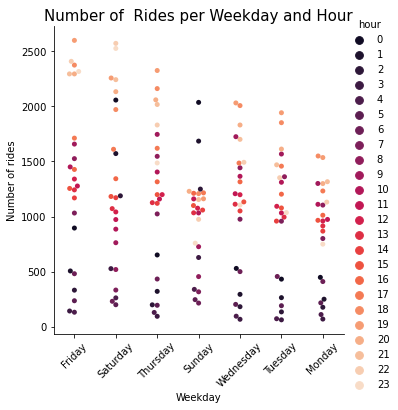

In [141]:
# plot checking for trends


g=sns.catplot(data=weekday_time_df2,
                x="weekday",
                y="ride_id",
                hue="hour",
                kind="swarm",
                palette="rocket");
g.set_xticklabels(rotation=45)
plt.xlabel("Weekday", size=10)
plt.ylabel("Number of rides", size=10)
plt.title("Number of  Rides per Weekday and Hour", size=15)

Friday and Saturday evenings seem like the most popular times

In [142]:
# does it pay off for the driver? check the times are usually

weekday_time_df3=time_driver_ride_df.groupby(["weekday","hour"], as_index = False).agg({"ride_id":"count","final_driver_revenue_before_commission$":"mean"}).sort_values(by="final_driver_revenue_before_commission$", ascending=False)

weekday_time_df3.head(10)

,weekday,hour,ride_id,final_driver_revenue_before_commission$
100,4.0,4.0,133,15.925799
149,6.0,5.0,247,15.588010
77,3.0,5.0,196,15.496034
125,5.0,5.0,201,15.349295
76,3.0,4.0,131,15.235039
150,6.0,6.0,216,15.205576
4,0.0,4.0,112,14.594357
28,1.0,4.0,74,14.414425
75,3.0,3.0,96,14.284230
5,0.0,5.0,218,13.934856


Late night/ early mornings are the ones where the revenue for the driver is higher in average, but there are less rides happening as expected

In [143]:
# does it pay off for lyft? analysis of the average revenue per ride

weekday_time_df4=time_driver_ride_df.groupby(["weekday","hour"], as_index = False).agg({"ride_id":"count","lyft_total_revenue_ride$":"mean"}).sort_values(by="lyft_total_revenue_ride$", ascending=False)

weekday_time_df4.head(10)

,weekday,hour,ride_id,lyft_total_revenue_ride$
100,4.0,4.0,133,4.877630
149,6.0,5.0,247,4.791292
77,3.0,5.0,196,4.778558
76,3.0,4.0,131,4.728486
150,6.0,6.0,216,4.705135
125,5.0,5.0,201,4.704889
4,0.0,4.0,112,4.609571
28,1.0,4.0,74,4.569011
75,3.0,3.0,96,4.483035
5,0.0,5.0,218,4.467148


As expected, similar to the driver's revenue

In [144]:
# check predictive total revenues at a certain time with the total amout of rides and the average earning per ride

weekday_rev_df=weekday_time_df4.copy()

weekday_rev_df["hour"]=weekday_rev_df["hour"].astype("int")
weekday_rev_df["weekday"]=weekday_rev_df["weekday"].replace([0, 1, 2, 3, 4, 5, 6], ["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"])
weekday_rev_df["total_predicted_revenue"]=weekday_rev_df["ride_id"]*weekday_rev_df["lyft_total_revenue_ride$"]
weekday_rev_df.sort_values(by="total_predicted_revenue", ascending=False)


,weekday,hour,ride_id,lyft_total_revenue_ride$,total_predicted_revenue
115,Friday,19,2597,3.476565,9028.638537
143,Saturday,23,2524,3.559186,8983.385724
142,Saturday,22,2570,3.460368,8893.146713
118,Friday,22,2407,3.614093,8699.121640
114,Friday,18,2373,3.643000,8644.838831
...,...,...,...,...,...
52,Wednesday,4,97,4.225843,409.906764
28,Tuesday,4,74,4.569011,338.106820
51,Wednesday,3,69,4.279982,295.318771
3,Monday,3,71,4.002280,284.161904


The results are very similar to the demand of rides per hour.
It makeses sense given the margins that the fact that there are much more rides brings higher revenue

Text(0.5, 1.0, 'Number of  Rides per Weekday and Hour')

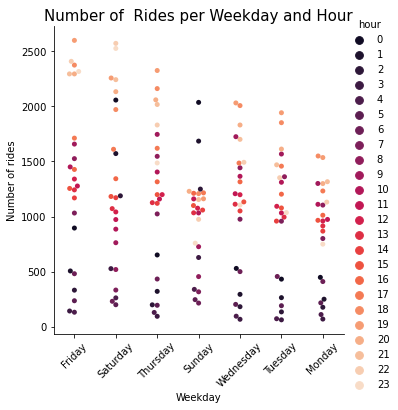

In [145]:
# plot checking for trends, looking into the total count per hour and weekday


g=sns.catplot(data=weekday_time_df2,
                x="weekday",
                y="ride_id",
                hue="hour",
                kind="swarm",
                palette="rocket");
g.set_xticklabels(rotation=45)
plt.xlabel("Weekday", size=10)
plt.ylabel("Number of rides", size=10)
plt.title("Number of  Rides per Weekday and Hour", size=15)

In [146]:
# further analyses with day and time, check if some holiday could influence it for instance

weekday_time_df5=time_driver_ride_df.groupby(["month","day","hour"], as_index = False).agg({"ride_id":"count"}).sort_values(by="ride_id", ascending=False)

weekday_time_df5.head()

,month,day,hour,ride_id
1125,5.0,14.0,22.0,302
1126,5.0,14.0,23.0,299
1461,5.0,28.0,22.0,288
1294,5.0,21.0,23.0,284
1098,5.0,13.0,19.0,276


In [147]:
#check deeper without the hour to see overall trend

weekday_time_df6=time_driver_ride_df.groupby(["month","day"], as_index = False).agg({"ride_id":"count"}).sort_values(by="ride_id", ascending=False)

weekday_time_df6.head(10)

,month,day,ride_id
47,5.0,14.0,3390
53,5.0,20.0,3378
54,5.0,21.0,3318
46,5.0,13.0,3246
67,6.0,3.0,3194
89,6.0,25.0,3085
81,6.0,17.0,3056
60,5.0,27.0,3040
74,6.0,10.0,3016
88,6.0,24.0,2965


No major events that could explain higher demand found

In [148]:
#check if there were events that could explain lack of demand

weekday_time_df6.tail()

,month,day,ride_id
2,3.0,30.0,371
6,4.0,3.0,323
1,3.0,29.0,258
0,3.0,28.0,115
91,6.0,27.0,13


Again, no major events. A potential gun shot found but probably not significant affect demaind by the end of March.
There was a tornado in the end of March in some US regions, but not enough information about location to correlate with this.

In [149]:
# Prime time analysis - are there hours that more driver`s should be incentivised to be available?

weekday_time_df7=time_driver_ride_df.groupby(["weekday","hour"], as_index = False).agg({"ride_primetime_min":"sum"}).sort_values(by="ride_primetime_min", ascending=False)

In [150]:
# prepare to plot

weekday_time_df7["hour"]=weekday_time_df7["hour"].astype("int")
weekday_time_df7["weekday"]=weekday_time_df7["weekday"].replace([0, 1, 2, 3, 4, 5, 6], ["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"])

In [151]:
# check

weekday_time_df7.head(10)

,weekday,hour,ride_primetime_min
90,Thursday,18,1284.166667
146,Sunday,2,1230.416667
66,Wednesday,18,1052.916667
143,Saturday,23,1013.333333
122,Saturday,2,937.083333
114,Friday,18,922.500000
93,Thursday,21,916.250000
94,Thursday,22,879.583333
118,Friday,22,859.583333
142,Saturday,22,836.250000


Text(0.5, 1.0, 'Total Prime Time per Weekday and Hour')

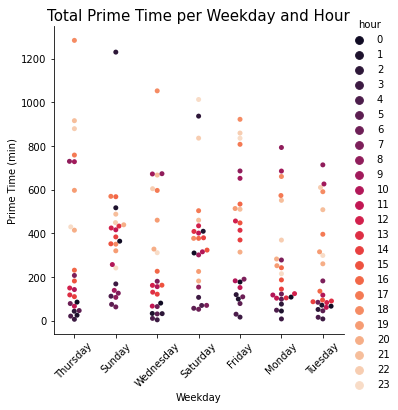

In [152]:
# plot checking for trends, looking into the total count per hour and weekday


g=sns.catplot(data=weekday_time_df7,
                x="weekday",
                y="ride_primetime_min",
                hue="hour",
                kind="swarm",
                palette="rocket");
g.set_xticklabels(rotation=45)
plt.xlabel("Weekday", size=10)
plt.ylabel("Prime Time (min)", size=10)
plt.title("Total Prime Time per Weekday and Hour", size=15)

# 2.5. Timeseries and Churn Analysis

In [153]:
# create copy

churn_predictdf=onboarding_lastridedf.copy()

In [154]:
# put the timestamp in the best format

churn_predictdf['date']=churn_predictdf['timestamp'].dt.date

In [155]:
# select only one even of the ride

churn_predictdf=churn_predictdf.loc[churn_predictdf["event"]=="dropped_off_at"]

churn_predictdf.head()

,driver_id,driver_onboard_date,ride_id,ride_primetime_min,event,timestamp,date
4,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,0.833333,dropped_off_at,2016-04-23 02:22:07,2016-04-23
9,002be0ffdc997bd5c50703158b7c2491,2016-03-29,01b522c5c3a756fbdb12e95e87507eda,0.000000,dropped_off_at,2016-03-29 19:17:30,2016-03-29
14,002be0ffdc997bd5c50703158b7c2491,2016-03-29,029227c4c2971ce69ff2274dc798ef43,0.000000,dropped_off_at,2016-06-21 12:11:07,2016-06-21
19,002be0ffdc997bd5c50703158b7c2491,2016-03-29,034e861343a63ac3c18a9ceb1ce0ac69,0.416667,dropped_off_at,2016-05-19 10:13:58,2016-05-19
24,002be0ffdc997bd5c50703158b7c2491,2016-03-29,034f2e614a2f9fc7f1c2f77647d1b981,1.666667,dropped_off_at,2016-04-20 22:20:45,2016-04-20


In [156]:
churn_predictdf2=churn_predictdf.groupby(["driver_id","driver_onboard_date","date"], as_index=False).agg({'ride_id':'count'})

In [157]:
# confirm dataframe

churn_predictdf2

,driver_id,driver_onboard_date,date,ride_id
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29,2016-03-29,6
1,002be0ffdc997bd5c50703158b7c2491,2016-03-29,2016-03-31,8
2,002be0ffdc997bd5c50703158b7c2491,2016-03-29,2016-04-01,6
3,002be0ffdc997bd5c50703158b7c2491,2016-03-29,2016-04-02,6
4,002be0ffdc997bd5c50703158b7c2491,2016-03-29,2016-04-05,7
...,...,...,...,...
26184,ffff51a71f2f185ec5e97d59dbcd7a78,2016-05-04,2016-06-22,4
26185,ffff51a71f2f185ec5e97d59dbcd7a78,2016-05-04,2016-06-24,17
26186,ffff51a71f2f185ec5e97d59dbcd7a78,2016-05-04,2016-06-25,7
26187,ffff51a71f2f185ec5e97d59dbcd7a78,2016-05-04,2016-06-26,1


In [158]:
# check one random driver

churn_predictdf2.loc[churn_predictdf2["driver_id"]=="002be0ffdc997bd5c50703158b7c2491"]


,driver_id,driver_onboard_date,date,ride_id
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29,2016-03-29,6
1,002be0ffdc997bd5c50703158b7c2491,2016-03-29,2016-03-31,8
2,002be0ffdc997bd5c50703158b7c2491,2016-03-29,2016-04-01,6
3,002be0ffdc997bd5c50703158b7c2491,2016-03-29,2016-04-02,6
4,002be0ffdc997bd5c50703158b7c2491,2016-03-29,2016-04-05,7
5,002be0ffdc997bd5c50703158b7c2491,2016-03-29,2016-04-07,2
6,002be0ffdc997bd5c50703158b7c2491,2016-03-29,2016-04-09,1
7,002be0ffdc997bd5c50703158b7c2491,2016-03-29,2016-04-10,1
8,002be0ffdc997bd5c50703158b7c2491,2016-03-29,2016-04-11,2
9,002be0ffdc997bd5c50703158b7c2491,2016-03-29,2016-04-12,11


In [159]:
# check another driver

churn_predictdf2.loc[churn_predictdf2["driver_id"]=="ffff51a71f2f185ec5e97d59dbcd7a78"]

,driver_id,driver_onboard_date,date,ride_id
26151,ffff51a71f2f185ec5e97d59dbcd7a78,2016-05-04,2016-05-04,1
26152,ffff51a71f2f185ec5e97d59dbcd7a78,2016-05-04,2016-05-06,1
26153,ffff51a71f2f185ec5e97d59dbcd7a78,2016-05-04,2016-05-07,4
26154,ffff51a71f2f185ec5e97d59dbcd7a78,2016-05-04,2016-05-08,10
26155,ffff51a71f2f185ec5e97d59dbcd7a78,2016-05-04,2016-05-09,10
26156,ffff51a71f2f185ec5e97d59dbcd7a78,2016-05-04,2016-05-10,5
26157,ffff51a71f2f185ec5e97d59dbcd7a78,2016-05-04,2016-05-11,2
26158,ffff51a71f2f185ec5e97d59dbcd7a78,2016-05-04,2016-05-12,9
26159,ffff51a71f2f185ec5e97d59dbcd7a78,2016-05-04,2016-05-13,2
26160,ffff51a71f2f185ec5e97d59dbcd7a78,2016-05-04,2016-05-14,25


It would be interesting to check deeper the number of ride drops closer to offboarding